### Day12


In [10]:
import numpy as np
import pandas as pd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [18]:

def check_small1(l):
    s = [char for char in l if char.isupper() == False ]
    m = len(Counter(s).values()) - len(s)
    # if m is zero means that there are no repetition
    if  m == 0:
        return 1
    else:
        return 0 
def check_small2(l):
    s = [char for char in l if char.isupper() == False ]
    m = np.abs(len(Counter(s).values()) - len(s) )
    # if m is zero means that there are no repetition
    if  m == 0 or m == 1:
        return 1
    else:
        return 0 
def count_paths1(path, G):
    
    for j in G.neighbors(path[-1]):
        c = path.copy()
        if j == 'start':
            continue
            #print( 'no')
        else:
            c.append(j)
            #path.extend( j )
            #print( c , j, path[-1], path)
            if check_small1(c):
                #print( c , j)
                if j == 'end':
                    global count
                    count = count + 1
                else:
                    count_paths1(c,G)

def count_paths2(path, G):
    
    for j in G.neighbors(path[-1]):
        c = path.copy()
        if j == 'start':
            continue
            #print( 'no')
        else:
            c.append(j)
            #path.extend( j )
            #print( c , j, path[-1], path)
            if check_small2(c):
                #print( c , j)
                if j == 'end':
                    global count
                    count = count + 1
                else:
                    count_paths2(c,G)


In [19]:
data = np.loadtxt("day12.txt", delimiter = '-', dtype = 'str')
nrow = int(len(data[:,0]))
ncol = int(len(data[0,:]))
l = [ char for i in range(nrow) for char in data[i,:]]
n = int(len(Counter(l).keys()) )
print( data )

[['CI' 'hb']
 ['IK' 'lr']
 ['vr' 'tf']
 ['lr' 'end']
 ['XP' 'tf']
 ['start' 'vr']
 ['lr' 'io']
 ['hb' 'qi']
 ['end' 'CI']
 ['tf' 'YK']
 ['end' 'YK']
 ['XP' 'lr']
 ['XP' 'vr']
 ['lr' 'EU']
 ['tf' 'CI']
 ['EU' 'vr']
 ['start' 'tf']
 ['YK' 'hb']
 ['YK' 'vr']
 ['start' 'EU']
 ['lr' 'CI']
 ['hb' 'XP']
 ['XP' 'io']
 ['tf' 'EU']]


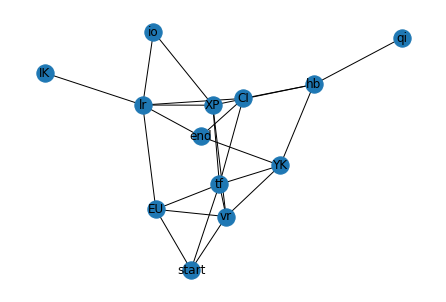

['start', 'vr']
['start', 'tf']
['start', 'EU']


In [ ]:
G = nx.Graph()
for i in range(nrow):
    G.add_edge(data[i,0], data[i,1])

nx.draw(G, with_labels=True) #, node_color = values)
plt.show()
count = 0 
u = 'start'
for j in G.neighbors(u):
    path = [u]
    path.append(j )
    print( path)
    
    if check_small2(path):
        if path[-1] == 'end':
            count = count + 1
            #paths.append(path)
        else:
            count_paths2(path,  G)
print( count )